In [6]:
from google.cloud.bigquery import magics
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file(
    '/home/okano/switch-bot-320517-13164e6e01d8.json')

scoped_credentials = credentials.with_scopes(
    ['https://www.googleapis.com/auth/cloud-platform'])

magics.context.credentials = credentials

In [4]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/okano/switch-bot-320517-13164e6e01d8.json'

In [1]:
%load_ext google.cloud.bigquery

In [7]:
%%bigquery meter_data
SELECT * FROM `switch-bot-320517.import.meter` WHERE dt = "2022-04-01"

In [8]:
meter_data

,exec_time,device,temperature,humidity,dt
0,2022-04-01 18:54:06+00:00,north_room,19.4,48,2022-04-01
1,2022-04-01 19:00:06+00:00,north_room,19.0,48,2022-04-01
2,2022-04-01 19:06:06+00:00,north_room,18.6,49,2022-04-01
3,2022-04-01 22:00:06+00:00,north_room,18.4,49,2022-04-01
4,2022-04-01 22:35:06+00:00,north_room,17.9,49,2022-04-01
...,...,...,...,...,...
471,2022-04-01 13:01:06+00:00,south_room,14.8,67,2022-04-01
472,2022-04-01 13:07:06+00:00,south_room,14.8,67,2022-04-01
473,2022-04-01 13:13:06+00:00,south_room,14.9,67,2022-04-01
474,2022-04-01 00:06:06+00:00,south_room,17.8,68,2022-04-01


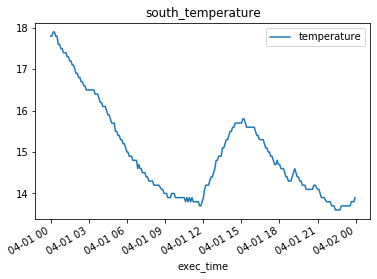

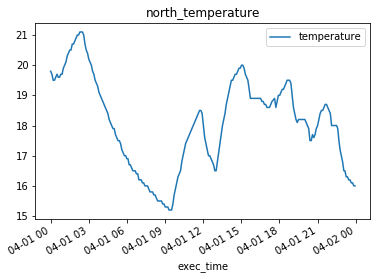

In [12]:
%matplotlib inline
temperature = meter_data[['exec_time','device','temperature']]
south_temp = temperature.loc[temperature['device'] == 'south_room'].plot.line(x='exec_time').set_title('south_temperature')
north_temp = temperature.loc[temperature['device'] == 'north_room'].plot.line(x='exec_time').set_title('north_temperature')